# Comparison on the attacks on Adult using Trepan for the generation of the dataset used to build the DTs

For this attack the instances to create the local models are selected by maximizing the distance among them in order to cover the space.

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../../.."
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../../.."
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import HardVotingClassifier, SoftVotingClassifier, KMostSureVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2

# Loading the Adult dataset

In [2]:
from utils.dataloading.adult import load_adult_data, load_adult_randomforest # type: ignore

BB = load_adult_randomforest()
BB_DATA = load_adult_data()

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))
test_representatives_x = BB_DATA['X_distance_separated']
test_representatives_y = BB_DATA['y_distance_separated']
n_datasets = len(test_representatives_x)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.61      0.69      2690

    accuracy                           0.86     10847
   macro avg       0.84      0.78      0.80     10847
weighted avg       0.86      0.86      0.86     10847



## Noisy dataset 
This section contains the attacks made **using the noisy dataset** to create the Shadow Models

### Whithout filtering
This section contains the results of the attack on the noisy dataset, without filtering the points used to create the Decision Trees.

In [3]:
ADULT_NOISY_NOFILTER_TREPAN = Path("../../noisy/adult/experiment_output/")

def check_exists(i):
    atkm0 = (ADULT_NOISY_NOFILTER_TREPAN / f"{i}" / "attack" / "0" / "model.pkl.bz2").exists()
    return atkm0 and (ADULT_NOISY_NOFILTER_TREPAN / f"{i}" / "attack" / "1" / "model.pkl.bz2").exists()

ATTACK_MODELS_NUMBERS = [i for i in range(len(test_representatives_x)) if  check_exists(i)]
print(*ATTACK_MODELS_NUMBERS, sep=" ")    
attack_models_0 = [load_pickle_bz2(ADULT_NOISY_NOFILTER_TREPAN / f"{i}" / "attack" / "0" / "model.pkl.bz2") for i in ATTACK_MODELS_NUMBERS]
attack_models_1 = [load_pickle_bz2(ADULT_NOISY_NOFILTER_TREPAN / f"{i}" / "attack" / "1" / "model.pkl.bz2") for i in ATTACK_MODELS_NUMBERS]

0 1 2 3 4 5 6 7 8 9 10 12 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39


#### Hard Voting

Hard voting on the noisy dataset without filtering.

report full
              precision    recall  f1-score   support

          in       0.70      0.21      0.33     25186
         out       0.30      0.79      0.44     10787

    accuracy                           0.39     35973
   macro avg       0.50      0.50      0.38     35973
weighted avg       0.58      0.39      0.36     35973


Class 0
              precision    recall  f1-score   support

          in       0.69      0.02      0.04     20231
         out       0.30      0.98      0.46      8706

    accuracy                           0.31     28937
   macro avg       0.49      0.50      0.25     28937
weighted avg       0.57      0.31      0.17     28937


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4955
         out       0.33      0.01      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.52      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

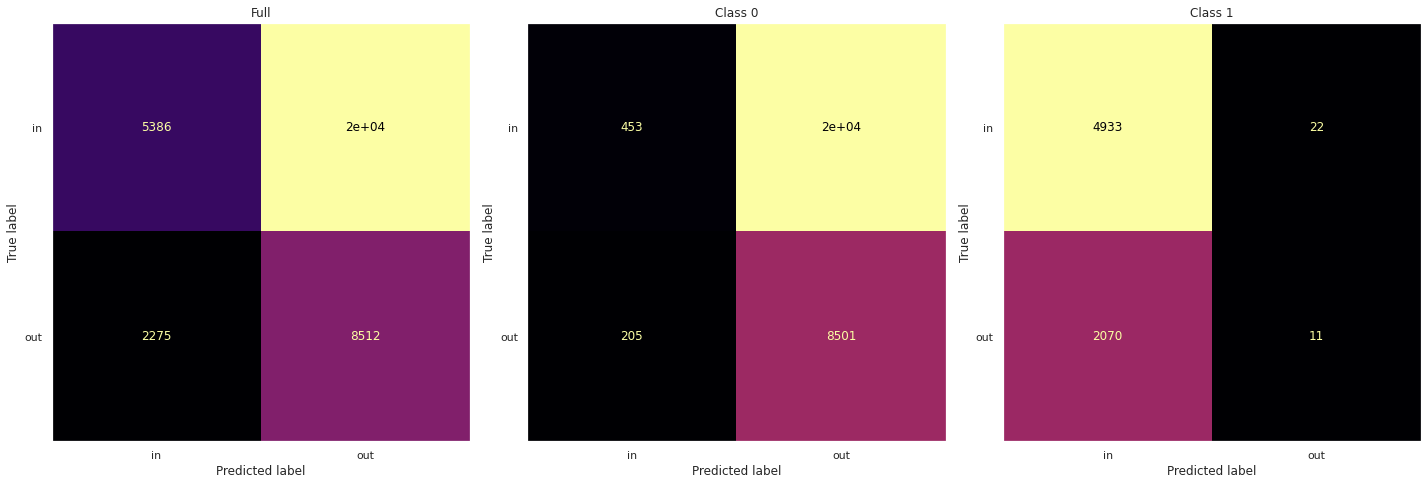

In [4]:
hv0 = HardVotingClassifier(classifiers=attack_models_0)
hv1 = HardVotingClassifier(classifiers=attack_models_1)
evaluate_attack(hv0, hv1, BB, BB_DATA)

#### Soft Voting

Soft voting on the noisy dataset without filtering.

report full
              precision    recall  f1-score   support

          in       0.70      0.93      0.80     25308
         out       0.30      0.07      0.11     10847

    accuracy                           0.67     36155
   macro avg       0.50      0.50      0.46     36155
weighted avg       0.58      0.67      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.92      0.79     20353
         out       0.30      0.08      0.13      8766

    accuracy                           0.67     29119
   macro avg       0.50      0.50      0.46     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4955
         out       0.32      0.01      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.51      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

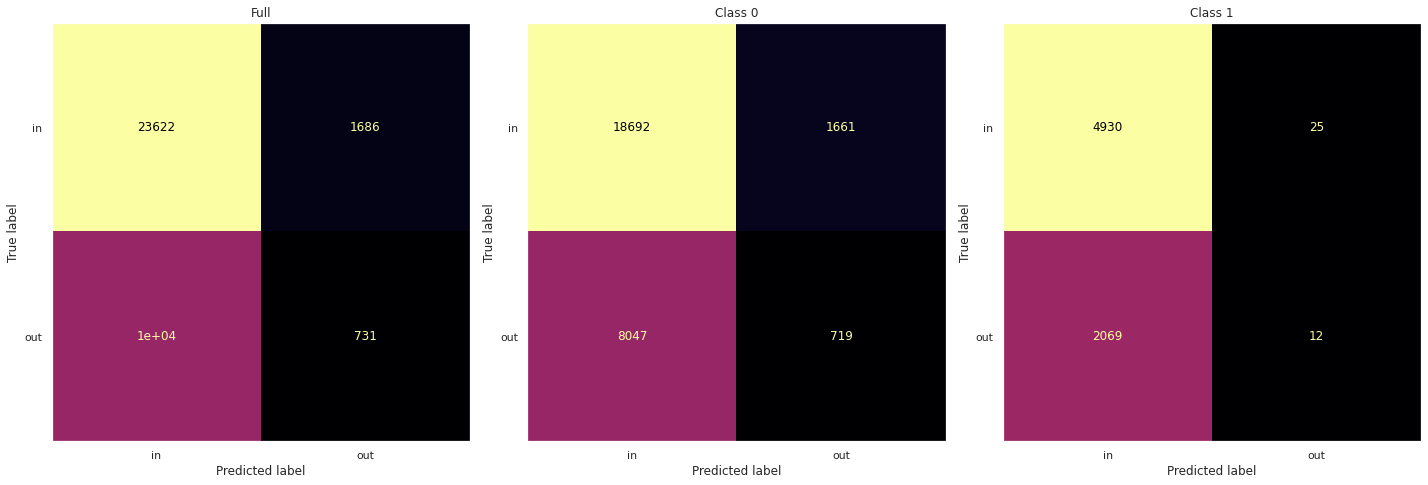

In [5]:
sv0 = SoftVotingClassifier(classifiers=attack_models_0)
sv1 = SoftVotingClassifier(classifiers=attack_models_1)
evaluate_attack(sv0, sv1, BB, BB_DATA)

### With filtering
This section contains the results of the attack on the noisy dataset **with** filtering of the points used to create the Decision Trees.

In [6]:
ADULT_NOISY_WITH_FILTER_TREPAN = Path("../../noisy_filtering/adult/experiment_output/")

def check_exists(i):
    atkm0 = (ADULT_NOISY_WITH_FILTER_TREPAN / f"{i}" / "attack" / "0" / "model.pkl.bz2").exists()
    return atkm0 and (ADULT_NOISY_WITH_FILTER_TREPAN / f"{i}" / "attack" / "1" / "model.pkl.bz2").exists()

ATTACK_MODELS_NUMBERS = [i for i in range(len(test_representatives_x)) if  check_exists(i)]
print(*ATTACK_MODELS_NUMBERS, sep=" ")    
attack_models_0 = [load_pickle_bz2(ADULT_NOISY_WITH_FILTER_TREPAN / f"{i}" / "attack" / "0" / "model.pkl.bz2") for i in ATTACK_MODELS_NUMBERS]
attack_models_1 = [load_pickle_bz2(ADULT_NOISY_WITH_FILTER_TREPAN / f"{i}" / "attack" / "1" / "model.pkl.bz2") for i in ATTACK_MODELS_NUMBERS]

0 2 3 4 5 6 7 8 9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39


#### Hard Voting

Hard voting on the noisy dataset **with** filtering.

report full
              precision    recall  f1-score   support

          in       0.70      0.80      0.75      7654
         out       0.32      0.22      0.26      3320

    accuracy                           0.62     10974
   macro avg       0.51      0.51      0.50     10974
weighted avg       0.59      0.62      0.60     10974


Class 0
              precision    recall  f1-score   support

          in       0.69      0.43      0.53      2700
         out       0.32      0.58      0.41      1241

    accuracy                           0.48      3941
   macro avg       0.51      0.51      0.47      3941
weighted avg       0.57      0.48      0.49      3941


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4954
         out       0.28      0.00      0.01      2079

    accuracy                           0.70      7033
   macro avg       0.49      0.50      0.42      7033
weighted avg       0.58      0.70      0.58 

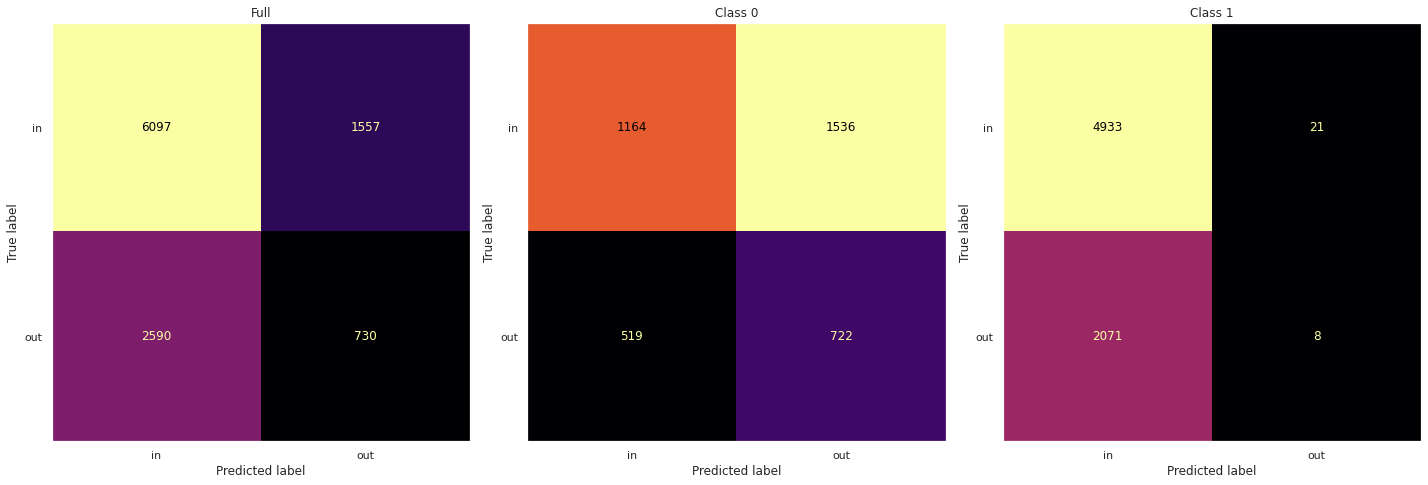

In [7]:
hv0 = HardVotingClassifier(classifiers=attack_models_0)
hv1 = HardVotingClassifier(classifiers=attack_models_1)
evaluate_attack(hv0, hv1, BB, BB_DATA)

#### Soft Voting

Soft voting on the noisy dataset **with** filtering.

report full
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     25308
         out       0.30      0.06      0.11     10847

    accuracy                           0.67     36155
   macro avg       0.50      0.50      0.45     36155
weighted avg       0.58      0.67      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.92      0.80     20353
         out       0.30      0.08      0.12      8766

    accuracy                           0.67     29119
   macro avg       0.50      0.50      0.46     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4955
         out       0.34      0.01      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.52      0.50      0.42      7036
weighted avg       0.60      0.70      0.58 

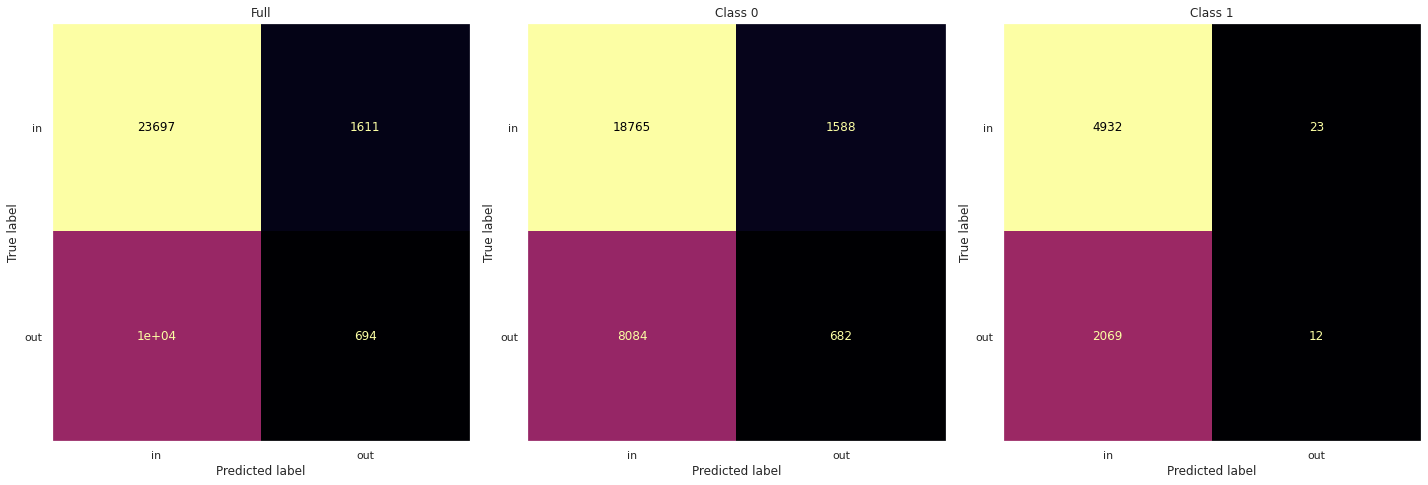

In [8]:
sv0 = SoftVotingClassifier(classifiers=attack_models_0)
sv1 = SoftVotingClassifier(classifiers=attack_models_1)
evaluate_attack(sv0, sv1, BB, BB_DATA)

## Statistical dataset 
This section contains the attacks made **using the statistical dataset** to create the Shadow Models

### Whithout filtering
This section contains the results of the attack on the statistical dataset, without filtering the points used to create the Decision Trees.

In [9]:
ADULT_STATISTICAL_NOFILTER_TREPAN = Path("../../statistical/adult/experiment_output/")

def check_exists(i):
    atkm0 = (ADULT_STATISTICAL_NOFILTER_TREPAN / f"{i}" / "attack" / "0" / "model.pkl.bz2").exists()
    return atkm0 and (ADULT_STATISTICAL_NOFILTER_TREPAN / f"{i}" / "attack" / "1" / "model.pkl.bz2").exists()

ATTACK_MODELS_NUMBERS = [i for i in range(len(test_representatives_x)) if  check_exists(i)]
print(*ATTACK_MODELS_NUMBERS, sep=" ")    
attack_models_0 = [load_pickle_bz2(ADULT_STATISTICAL_NOFILTER_TREPAN / f"{i}" / "attack" / "0" / "model.pkl.bz2") for i in ATTACK_MODELS_NUMBERS]
attack_models_1 = [load_pickle_bz2(ADULT_STATISTICAL_NOFILTER_TREPAN / f"{i}" / "attack" / "1" / "model.pkl.bz2") for i in ATTACK_MODELS_NUMBERS]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 18 19 20 22 23 24 25 26 28 30 31 32 33 34 35 36 37 38 39


#### Hard Voting

Hard voting on the statistical dataset **without** filtering.

report full
              precision    recall  f1-score   support

          in       0.70      0.83      0.76     24908
         out       0.30      0.17      0.21     10664

    accuracy                           0.63     35572
   macro avg       0.50      0.50      0.49     35572
weighted avg       0.58      0.63      0.60     35572


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.82     20014
         out       0.30      0.02      0.03      8606

    accuracy                           0.69     28620
   macro avg       0.50      0.50      0.43     28620
weighted avg       0.58      0.69      0.58     28620


Class 1
              precision    recall  f1-score   support

          in       0.71      0.20      0.32      4894
         out       0.30      0.80      0.43      2058

    accuracy                           0.38      6952
   macro avg       0.50      0.50      0.37      6952
weighted avg       0.58      0.38      0.35 

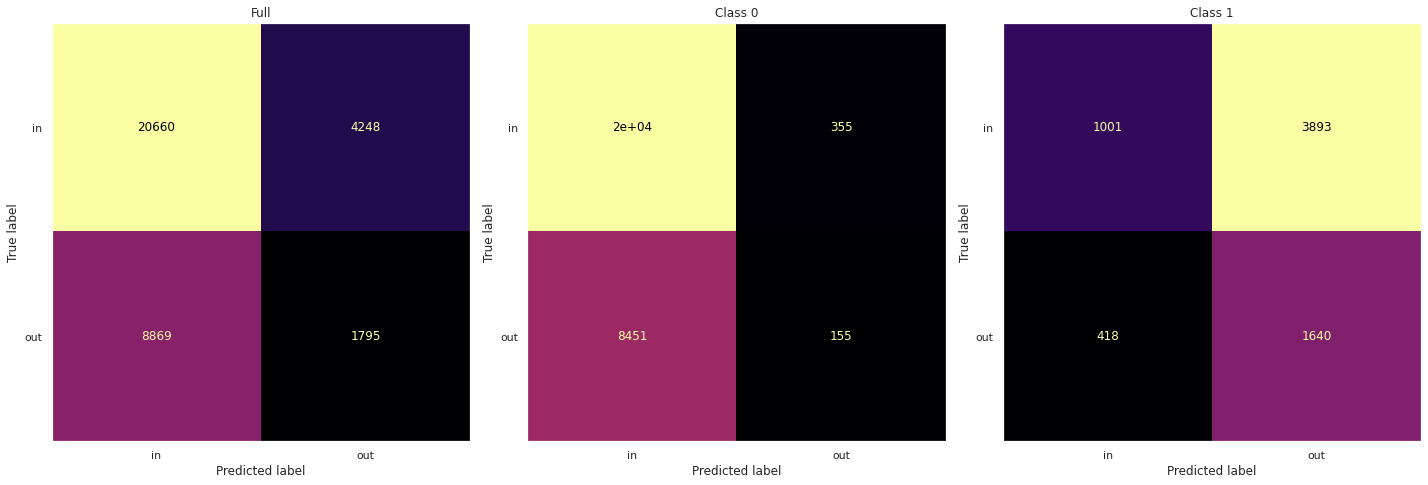

In [10]:
hv0 = HardVotingClassifier(classifiers=attack_models_0)
hv1 = HardVotingClassifier(classifiers=attack_models_1)
evaluate_attack(hv0, hv1, BB, BB_DATA)

#### Soft Voting

Soft voting on the statistical dataset **without** filtering.

report full
              precision    recall  f1-score   support

          in       0.70      0.96      0.81     25308
         out       0.31      0.05      0.08     10847

    accuracy                           0.68     36155
   macro avg       0.50      0.50      0.44     36155
weighted avg       0.58      0.68      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82     20353
         out       0.23      0.00      0.01      8766

    accuracy                           0.70     29119
   macro avg       0.47      0.50      0.41     29119
weighted avg       0.56      0.70      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.79      0.75      4955
         out       0.31      0.23      0.27      2081

    accuracy                           0.62      7036
   macro avg       0.51      0.51      0.51      7036
weighted avg       0.59      0.62      0.60 

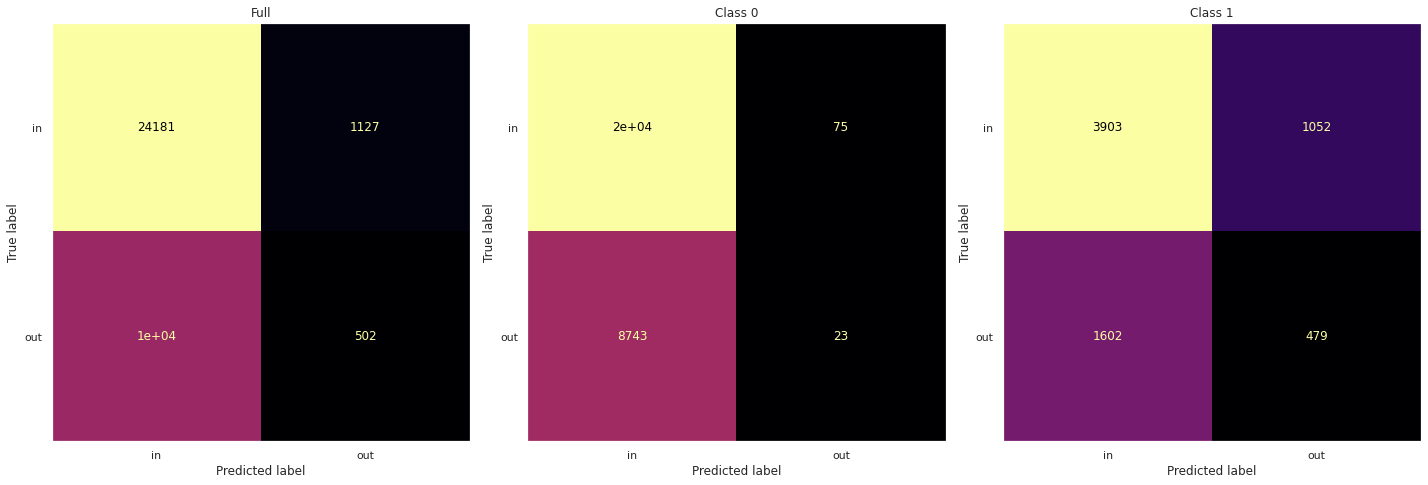

In [11]:
hv0 = SoftVotingClassifier(classifiers=attack_models_0)
hv1 = SoftVotingClassifier(classifiers=attack_models_1)
evaluate_attack(hv0, hv1, BB, BB_DATA)